In this notebook we demonstrate how pretraining models in an unsupervised manner can improve the label efficiency of a downstream task, in this case the EuroSAT classification task.

In [1]:
experiments = [
    'scratch',
    'imagenet-ft',
    'imagenet-tl',
    'ssl-ft',
    'ssl-tl'
]

label_ratios = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
# label_ratios = [0.01, 0.05]

logs_dir = 'logs'

In [2]:
import pandas as pd
import os

data = {}
for name in experiments:
    data[name] = {}
    for label_ratio in label_ratios:
        try:
            dir = f"{logs_dir}/{name}-{label_ratio}"
            versions = sorted(os.listdir(dir))
            latest_version = versions[-1]
            metrics = pd.read_csv(f"{dir}/{latest_version}/metrics.csv")
            last_val_acc = metrics.iloc[-1]['val_acc']
        except Exception as e:
            print(f"Error reading metrics for {name}-{label_ratio}: {e}")
            last_val_acc = 0.0
        data[name][label_ratio] = last_val_acc

# Create DataFrame with proper index
benchmark = pd.DataFrame(data)

benchmark

,scratch,imagenet-ft,imagenet-tl,ssl-ft,ssl-tl
0.01,0.184074,0.775370,0.715556,0.667407,0.429815
0.02,0.600370,0.826852,0.764630,0.740741,0.518333
0.05,0.657407,0.907407,0.831296,0.798333,0.616481
0.10,0.494444,0.941852,0.847963,0.828704,0.662037
0.20,0.627037,0.937593,0.865926,0.870741,0.682037
0.50,0.872778,0.973889,0.886481,0.905926,0.714815
1.00,0.848148,0.911296,0.900000,0.927593,0.740000


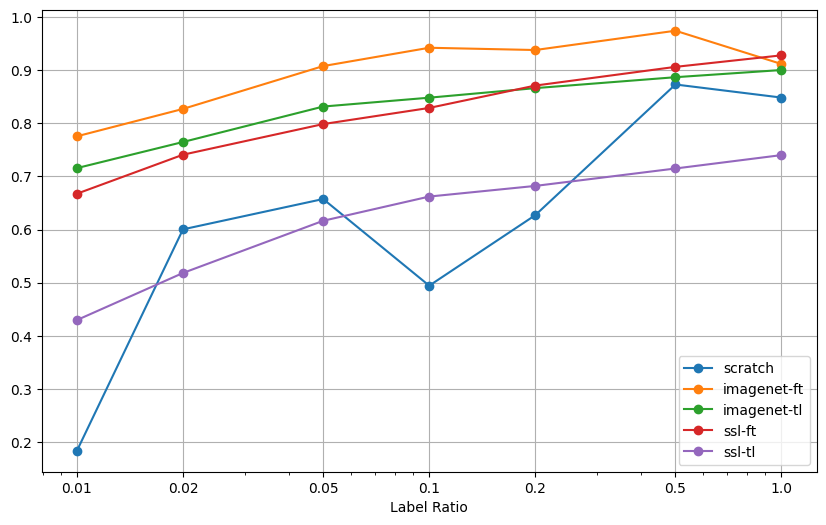

In [3]:
import matplotlib.pyplot as plt

benchmark.plot(kind='line', figsize=(10, 6), marker='o', grid=True)
plt.xscale('log')
plt.xlabel('Label Ratio')
plt.xticks(label_ratios, label_ratios)  
plt.show()
